In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Fetch data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [2]:
# Feature Engineering: Using closing prices as features
data['Close'] = data['Close']
data['Future'] = data['Close'].shift(-1)

# Drop the last row with NaN future value
data.dropna(inplace=True)

# Features and labels
X = data[['Close']]
y = data['Future']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


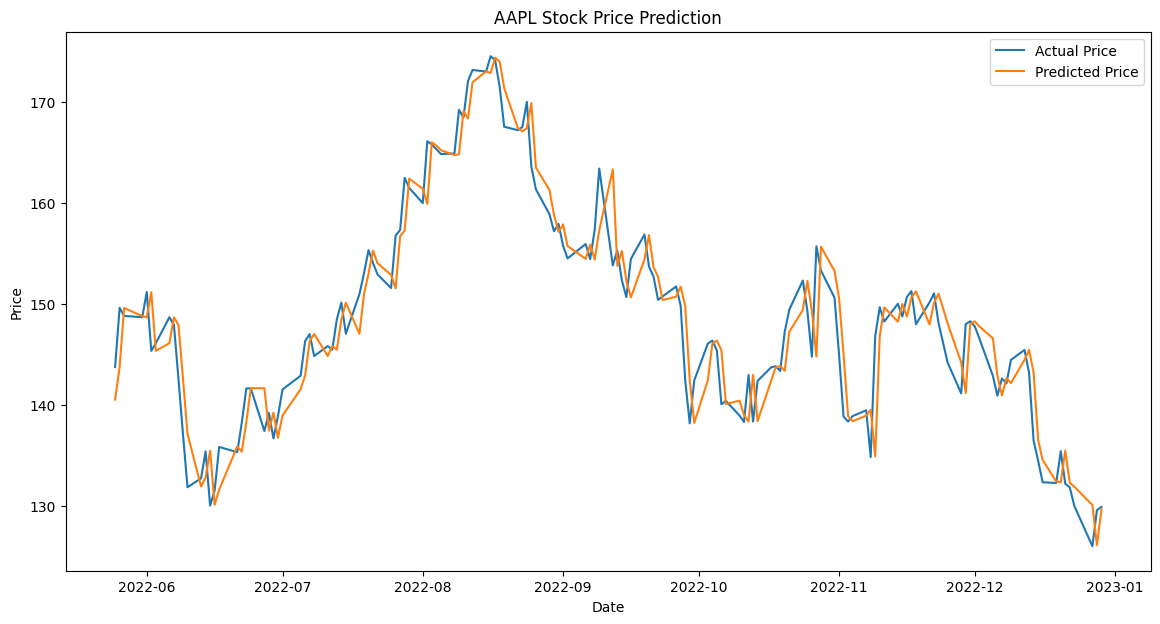

In [3]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.show()


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 10.979159847921862
Mean Absolute Error: 2.5541987635273418


In [5]:
def predict_next_day_price(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Close'] = data['Close']
    data['Future'] = data['Close'].shift(-1)
    data.dropna(inplace=True)

    X = data[['Close']]
    y = data['Future']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    model = LinearRegression()
    model.fit(X_scaled[:-1], y[:-1])
    
    next_day_price = model.predict([X_scaled[-1]])[0]
    return next_day_price

# Example usage
next_price = predict_next_day_price('AAPL', '2020-01-01', '2023-01-01')
print(f'Predicted next day price: {next_price}')


[*********************100%%**********************]  1 of 1 completed

Predicted next day price: 129.68676631539273
